In [6]:
!pip install xgboost

     --------------------------------------- 70.9/70.9 MB 31.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
# Import Python standard libraries
import time

# Import third-party libraries
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from wordcloud import WordCloud
import xgboost as xgb

# Import pandas (data manipulation library)
import pandas as pd
import numpy as np

# Import sklearn
from sklearn.model_selection import RandomizedSearchCV

# Import data preprocessing and model evaluation libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

# Import data splitting libraries
from sklearn.model_selection import train_test_split

In [8]:
# Disable SSL certificate verification
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

### Data Preprocessing
#### Data combining from different datasets

In [9]:
# List of topics for which the medium data is available
topic_list = [
    "health",
    "technology",
    "politics",
    "sports",
    "business",
    "entertainment",
    "environment",
    "lifestyle",
    "programming",
    "education",
]

# Create an empty dataframe to store the data
df = pd.DataFrame(columns=["title", "topic"])

# Read the data from the csv files and store it in the dataframe
for topic in topic_list:
    csv_file_path = f"../data/{topic}_news_data.csv"
    print(f"Reading CSV file: {csv_file_path}")
    topic_df = pd.read_csv(csv_file_path)
    df = pd.concat([df, topic_df], ignore_index=True)

# Print the shape of the dataframe
print(f"\nShape of the dataframe: {df.shape}")

Reading CSV file: ../data/health_news_data.csv
Reading CSV file: ../data/technology_news_data.csv
Reading CSV file: ../data/politics_news_data.csv
Reading CSV file: ../data/sports_news_data.csv
Reading CSV file: ../data/business_news_data.csv
Reading CSV file: ../data/entertainment_news_data.csv
Reading CSV file: ../data/environment_news_data.csv
Reading CSV file: ../data/lifestyle_news_data.csv
Reading CSV file: ../data/programming_news_data.csv
Reading CSV file: ../data/education_news_data.csv

Shape of the dataframe: (4448, 3)


### Dataframe Exploration
#### Initial understanding of the structure, content, and data types within a dataframe.

In [10]:
# Using head() to display the first 5 rows of the dataset
df.head()

,title,topic,Unnamed: 0
0,I Asked Leading Covid Scientists — Off the Rec...,health,0.0
1,Autopsy Findings of Vaccinated People (With Co...,health,1.0
2,Latest Autopsy Study on mRNA Vaccine Recipient...,health,2.0
3,From Infection to Recovery: How Long It Lasts,health,3.0
4,A Tough Covid Challenge: Reinforcing Our Wall ...,health,4.0


In [11]:
# Using tail() to display the last 5 rows of the dataset
df.tail()

,title,topic,Unnamed: 0
4443,“Balancing Act: How Students Can Deal with Stu...,education,404.0
4444,SCOTUS Likely To Negate Student Loan Forgivene...,education,405.0
4445,"I, The Ghost of a Woman Who Died in an 18th-Ce...",education,406.0
4446,The Latest Student Loan News: What Borrowers N...,education,407.0
4447,Reducing College Costs with YIMBYism,education,408.0


In [12]:
# Using info() to display the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4448 entries, 0 to 4447
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       4448 non-null   object 
 1   topic       4448 non-null   object 
 2   Unnamed: 0  4448 non-null   float64
dtypes: float64(1), object(2)
memory usage: 104.4+ KB


In [13]:
# Using dtypes to display the data types of the columns
df.dtypes

title          object
topic          object
Unnamed: 0    float64
dtype: object

In [14]:
# Using columns to display the columns of the dataset
df.columns

Index(['title', 'topic', 'Unnamed: 0'], dtype='object')

In [15]:
# Remove the rows with no meaning ("Unnamed: 0")
# Specify the columns to remove
columns_to_remove = ["Unnamed: 0"]

# Remove the specified columns
df = df.drop(columns=columns_to_remove)

In [20]:
t = df['topic'].unique()
print(t)
print('Length:',len(t))

['health' 'technology' 'politics' 'sports' 'business' 'entertainment'
 'environment' 'lifestyle' 'programming' 'education']
Length: 10


### Handling Duplicates
#### Identify and remove duplicate rows if they exist in the dataframe.

In [ ]:
# Check Shape of the dataset before handling duplicates
print("Shape of the dataset before handling duplicates: ", df.shape)

# Drop duplicate rows if there is any duplicate row
df = df.drop_duplicates()

# Check Shape of the dataset after handling duplicates
print("Shape of the dataset after handling duplicates: ", df.shape)

### Handling Missing Values
#### Identify missing values for each column

In [21]:
# Check for missing values
df.isnull().sum()

title    0
topic    0
dtype: int64

### Check If Imbalanced Classes
#### We try to categorize title data with topic so let's see if there is imbalance data or not

In [22]:
# Count the number of rows according to unique topics
print(f"Total number of unique topics: {df['topic'].nunique()}")
df["topic"].value_counts()

Total number of unique topics: 10


topic
business         587
technology       569
health           548
sports           536
programming      461
education        409
environment      406
politics         379
lifestyle        280
entertainment    273
Name: count, dtype: int64

In [25]:
# Combine some common topics
df["topic"] = df["topic"].replace("environment", "Environment and Ecology")

df["topic"] = df["topic"].replace("technology", "Science and Technology")
df["topic"] = df["topic"].replace("programming", "Science and Technology")

df["topic"] = df["topic"].replace("business", "News and Current Affairs")
df["topic"] = df["topic"].replace("politics", "News and Current Affairs")

df["topic"] = df["topic"].replace("health", "Health and Lifestyle")
df["topic"] = df["topic"].replace("lifestyle", "Health and Lifestyle")
df["topic"] = df["topic"].replace("education", "Health and Lifestyle")

df["topic"] = df["topic"].replace("sports", "Sports and Entertainment")
df["topic"] = df["topic"].replace("entertainment", "Sports and Entertainment")

In [24]:
# Count the number of rows according to unique topics
print(f"Total number of unique topics: {df['topic'].nunique()}")
df["topic"].value_counts()

Total number of unique topics: 5


topic
Health and Lifestyle        1237
Science and Technology      1030
News and Current Affairs     966
Sports and Entertainment     809
Environment and Ecology      406
Name: count, dtype: int64

In [26]:
# Get all unique topics name
actual_topics = df["topic"].unique()
actual_topics

array(['Health and Lifestyle', 'Science and Technology',
       'News and Current Affairs', 'Sports and Entertainment',
       'Environment and Ecology'], dtype=object)

### Text Processing

In [27]:
# Perform text preprocessing
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))
stemmer = SnowballStemmer("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shanover\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
# Create a function to perform text preprocessing
def preprocess_text(text):
    """
    Preprocesses the given text by converting to lowercase, tokenizing, removing stopwords,
    lemmatizing the tokens, and joining them back to a single string.

    Args:
        text (str): The input text to be preprocessed.

    Returns:
        str: The preprocessed text.
    """
    # Convert text to lowercase
    lowercase_text = text.lower()

    # Tokenization
    tokens = nltk.word_tokenize(lowercase_text)

    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [token for token in tokens if token not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join tokens back to a single string
    preprocessed_text = " ".join(lemmatized_tokens)

    return preprocessed_text

In [29]:
# Apply text preprocessing to the 'title' column
df["preprocessed_title"] = df["title"].apply(preprocess_text)

# Display the updated DataFrame
df.head()

,title,topic,preprocessed_title
0,I Asked Leading Covid Scientists — Off the Rec...,Health and Lifestyle,asked leading covid scientist — record — virus...
1,Autopsy Findings of Vaccinated People (With Co...,Health and Lifestyle,autopsy finding vaccinated people ( covid vacc...
2,Latest Autopsy Study on mRNA Vaccine Recipient...,Health and Lifestyle,latest autopsy study mrna vaccine recipient ge...
3,From Infection to Recovery: How Long It Lasts,Health and Lifestyle,infection recovery : long last
4,A Tough Covid Challenge: Reinforcing Our Wall ...,Health and Lifestyle,tough covid challenge : reinforcing wall immunity


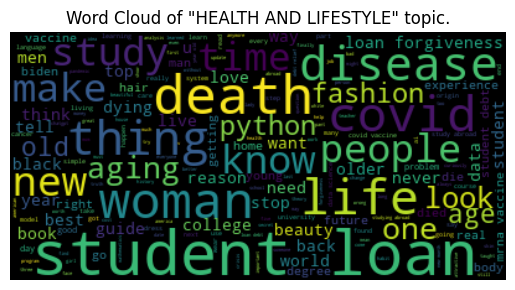

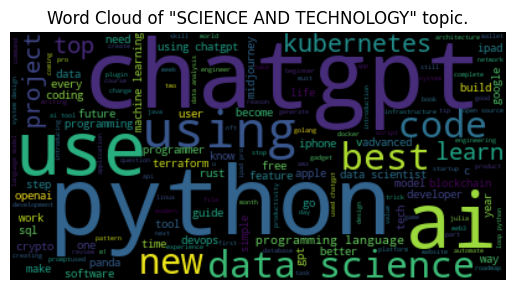

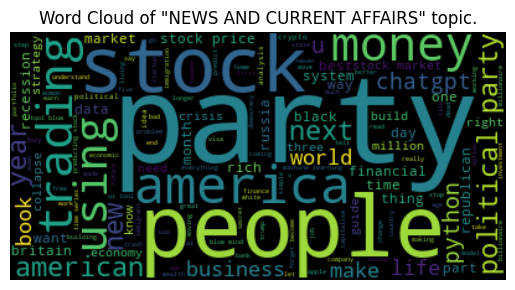

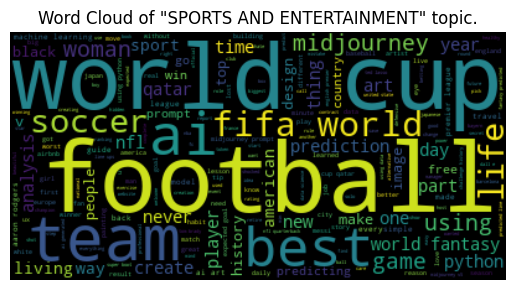

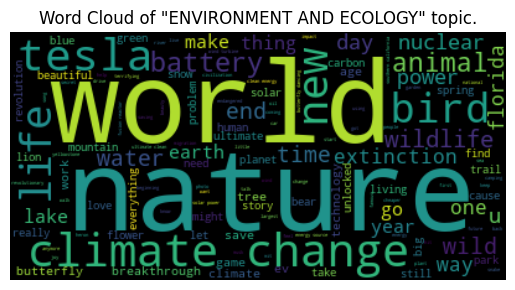

In [30]:
# Iterate over unique topics in the DataFrame
for topic in df["topic"].unique():
    # Get the preprocessed titles for the current topic and join them into a single string
    titles = df[df["topic"] == topic]["preprocessed_title"].tolist()
    text = " ".join(titles)

    # Generate the word cloud for the current topic
    wordcloud = WordCloud().generate(text)

    # Display the word cloud
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")

    # Set the title of the plot
    plt.title(f'Word Cloud of "{topic.upper()}" topic.')

    # Show the plot
    plt.show()

### Dataset Preparation for Training

In [32]:
# Separate the preprocessed text (features) and the corresponding topics (labels)
X = df["preprocessed_title"]
y = df["topic"]

# Perform stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

### Build Machine Learning Model

In [33]:
# Create an instance of the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Convert the preprocessed text in X_train into numerical representations using TF-IDF
X_train_tfidf = vectorizer.fit_transform(X_train)

# Convert the preprocessed text in X_test into numerical representations using TF-IDF
X_test_tfidf = vectorizer.transform(X_test)

#### Use Support Vector Classification to perform the model building

In [34]:
# Start time
start_time = time.time()

# Define the parameter grid for grid search
param_grid = {
    "C": [0.1, 1, 10],
    # The regularization parameter C.
    # Controls the trade-off between correct classification of training.
    # Smaller values specify stronger regularization.
    "kernel": ["linear", "rbf", "poly"],
    # The kernel type to be used in the Support Vector Machine.
    # 'linear' represents a linear kernel,
    # 'rbf' represents a radial basis function kernel,
    # 'poly' represents a polynomial kernel.
    "gamma": ["scale", "auto"],
    # The kernel coefficient for 'rbf' and 'poly'.
    # 'scale' uses 1 / (n_features * X.var()) as the value of gamma,
    # 'auto' uses 1 / n_features.
}

# Create the model
svm_model = SVC()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(X_train_tfidf, y_train)

# Get the best model
best_svm_model = grid_search.best_estimator_
best_svm_model

SVC(C=1, kernel='linear')

In [35]:
# Make predictions on the testing data using the best SVM model
y_test_pred_svm = best_svm_model.predict(X_test_tfidf)

# Make predictions on the training data using the best SVM model
y_train_pred_svm = best_svm_model.predict(X_train_tfidf)

# Calculate accuracy for the train and test datasets
svm_train_accuracy = accuracy_score(y_train, y_train_pred_svm)
svm_test_accuracy = accuracy_score(y_test, y_test_pred_svm)

# Print the accuracies
print("Train Accuracy of SVM:", svm_train_accuracy)
print("Test Accuracy of SVM:", svm_test_accuracy)

# End time
end_time = time.time()

# Calculate the duration
svm_duration = end_time - start_time

Train Accuracy of SVM: 0.9429454749859472
Test Accuracy of SVM: 0.7089887640449438


### Use Random Forest Model

In [36]:
# Start time
start_time = time.time()

# Define the parameter distribution for randomized search
param_distribution = {
    "n_estimators": [100, 200, 300],  # Number of trees in the random forest
    "max_depth": [5, 10, 15],  # Maximum depth of the tree
    "min_samples_split": [
        2,
        5,
        10,
    ],
    # Minimum number of samples required to split an internal node
    "min_samples_leaf": [
        1,
        3,
        5,
    ],
    # Minimum number of samples required to be at a leaf node
}

# Create a Random Forest classifier
rfc_model = RandomForestClassifier(random_state=42)

# Perform randomized search for hyperparameter tuning
random_search = RandomizedSearchCV(
    rfc_model, param_distributions=param_distribution, n_iter=10, cv=5, random_state=42
)
random_search.fit(X_train_tfidf, y_train)

# Get the best model and predict the labels for the test data
best_rf_model = random_search.best_estimator_
best_rf_model

RandomForestClassifier(max_depth=15, min_samples_leaf=3, min_samples_split=10,
                       n_estimators=200, random_state=42)

In [37]:
# Make predictions on the testing data using the best random forest model
y_test_rf_pred = best_rf_model.predict(X_test_tfidf)

# Make predictions on the training data using the best random forest model
y_train_rf_pred = best_rf_model.predict(X_train_tfidf)

# Calculate accuracy for the train and test datasets
rf_train_accuracy = accuracy_score(y_train, y_train_rf_pred)
rf_test_accuracy = accuracy_score(y_test, y_test_rf_pred)

# Print the accuracies
print("Train Accuracy of Random Forest:", rf_train_accuracy)
print("Test Accuracy of Random Forest:", rf_test_accuracy)

# End time
end_time = time.time()

# Calculate the duration
rf_duration = end_time - start_time

Train Accuracy of Random Forest: 0.5323215289488477
Test Accuracy of Random Forest: 0.49550561797752807


### Xg-boost 

In [38]:
# Start time
start_time = time.time()

# Convert the target variable into numerical labels
label_mapping = {topic: i for i, topic in enumerate(np.unique(df["topic"]))}
y_train_xgb = y_train.map(label_mapping)
y_test_xgb = y_test.map(label_mapping)

# Convert the data into DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train_tfidf, label=y_train_xgb)
dtest = xgb.DMatrix(X_test_tfidf, label=y_test_xgb)

# Set the parameters for XGBoost
xgb_params = {
    "objective": "multi:softmax",  # Multi-class classification objective
    "num_class": len(label_mapping),  # Number of classes
    "eta": 0.1,  # Learning rate
    "max_depth": 6,  # Maximum depth of a tree
    "subsample": 0.8,  # Subsample ratio of the training instances
    "colsample_bytree": 0.8,  # Subsample ratio of columns when constructing each tree
}

# Train the XGBoost model
best_xgb_model = xgb.train(xgb_params, dtrain)
best_xgb_model

In [42]:
# Make predictions on the test set using the best XGBoost model
y_test_pred_xgb = best_xgb_model.predict(dtest)
y_train_pred_xgb = best_xgb_model.predict(dtrain)

# Convert predicted labels back to original topics using label_mapping dictionary
predicted_topics_test = pd.Series(y_test_pred_xgb).map(
    {v: k for k, v in label_mapping.items()}
)
predicted_topics_train = pd.Series(y_train_pred_xgb).map(
    {v: k for k, v in label_mapping.items()}
)

# Create a reversed dictionary with keys and values swapped
reversed_dict = {value: key for key, value in label_mapping.items()}

# Convert the numeric labels back to the original labels for y_train_xgb and y_test_xgb
y_train_label = [reversed_dict[x] for x in y_train_xgb]
y_test_label = [reversed_dict[x] for x in y_test_xgb]

# Calculate the accuracy of the model
xgb_test_accuracy = accuracy_score(y_test_label, predicted_topics_test)
xgb_train_accuracy = accuracy_score(y_train_label, predicted_topics_train)

# Print the accuracies
print("Train Accuracy of XGB:", xgb_train_accuracy)
print("Test Accuracy of XGB:", xgb_test_accuracy)

# End time
end_time = time.time()

# Calculate the duration
xgb_duration = end_time - start_time

Train Accuracy of XGB: 0.5668915120854413
Test Accuracy of XGB: 0.5325842696629214


### Model Evaluation

In [40]:
!pip install tabulate

  Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
from tabulate import tabulate

# Train and test accuracies
train_accuracies = [svm_train_accuracy, rf_train_accuracy, xgb_train_accuracy]
test_accuracies = [svm_test_accuracy, rf_test_accuracy, xgb_test_accuracy]
time_durations = [svm_duration, rf_duration, xgb_duration]

# Create the table headers
headers = ["Model", "Train Accuracy", "Test Accuracy", "Time Duration (in seconds)"]

# Create the table rows
rows = [
    ["SVM", train_accuracies[0], test_accuracies[0], time_durations[0]],
    ["Random Forest", train_accuracies[1], test_accuracies[1], time_durations[1]],
    ["XGB", train_accuracies[2], test_accuracies[2], time_durations[2]],
]

# Print the table
print(tabulate(rows, headers, tablefmt="grid"))

+---------------+------------------+-----------------+------------------------------+
| Model         |   Train Accuracy |   Test Accuracy |   Time Duration (in seconds) |
+===============+==================+=================+==============================+
| SVM           |         0.942945 |        0.708989 |                      105.007 |
+---------------+------------------+-----------------+------------------------------+
| Random Forest |         0.532322 |        0.495506 |                      564.279 |
+---------------+------------------+-----------------+------------------------------+
| XGB           |         0.566892 |        0.532584 |                      234.871 |
+---------------+------------------+-----------------+------------------------------+


### Prediction New Topic

In [44]:
# Select the best model for sample predictions
best_model = best_rf_model

# Preprocess new titles
new_titles = [
    "Election Results: Party A Wins Majority Seats",
    "New Breakthrough in Cancer Treatment Research",
    "Tech Company Launches Revolutionary Product",
    "Government Implements New Tax Policy",
    "World Cup Finals: Team B Claims Victory",
    "Hollywood Star Wins Best Actor Award",
    "Climate Change Summit Calls for Urgent Action",
    "Tips for Healthy Eating and Fitness",
    "Learn Python Programming in 7 Days",
    "Global Education Conference Explores New Trends",
]

new_titles_preprocessed = [preprocess_text(title) for title in new_titles]

# Convert the preprocessed titles into numerical representations
new_titles_tfidf = vectorizer.transform(new_titles_preprocessed)

# Predict the topics of the new titles
new_titles_predictions = best_model.predict(new_titles_tfidf)

# Map titles to their respective topics
title_topic_mapping = dict(zip(new_titles, new_titles_predictions))

# Print the titles with their predicted topics
for title, topic in title_topic_mapping.items():
    print(f"Title: {title}\tTopic: {topic}\n")

Title: Election Results: Party A Wins Majority Seats	Topic: News and Current Affairs

Title: New Breakthrough in Cancer Treatment Research	Topic: Health and Lifestyle

Title: Tech Company Launches Revolutionary Product	Topic: Health and Lifestyle

Title: Government Implements New Tax Policy	Topic: Health and Lifestyle

Title: World Cup Finals: Team B Claims Victory	Topic: Sports and Entertainment

Title: Hollywood Star Wins Best Actor Award	Topic: Health and Lifestyle

Title: Climate Change Summit Calls for Urgent Action	Topic: Environment and Ecology

Title: Tips for Healthy Eating and Fitness	Topic: Health and Lifestyle

Title: Learn Python Programming in 7 Days	Topic: Science and Technology

Title: Global Education Conference Explores New Trends	Topic: Health and Lifestyle

